<Axes: >

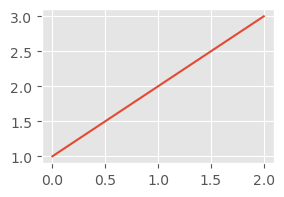

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
pd.Series([1,2,3]).plot(figsize=(3,2))


# 데이터 불러오기

In [2]:
df = pd.read_csv('data/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# 다중회귀

## 변수 선택

In [3]:
# -----------------------------------
# 독립변수, 종속변수 선택
# -----------------------------------
X= df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

## 훈련세트 테스트세트 분할

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

## 모델 생성 및 훈련

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## 평가

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
# -----------------------------------
# 테스트데이터의 예측값
# -----------------------------------
pred = model.predict(X_test)

# -----------------------------------
# 모델 평가
# -----------------------------------
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = root_mean_squared_error(y_test, pred)

print(f'mae:{mae:.2f}')
print(f'mse:{mse:.2f}')
print(f'rmse:{rmse:.2f}')
print(f'r2:{r2:.2f}')

mae:1.12
mse:2.40
rmse:1.55
r2:0.91


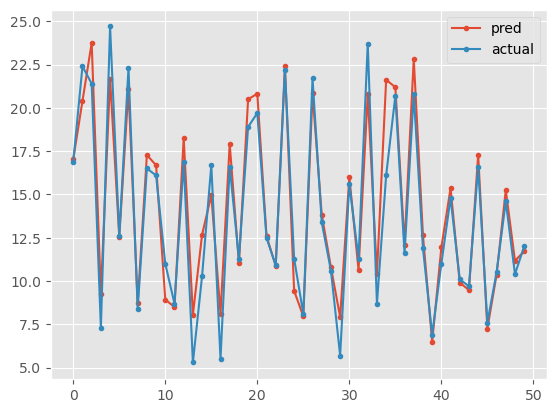

In [13]:
plt.plot(pred, marker='.', label='pred')
plt.plot(np.array(y_test), marker='.', label='actual')
plt.legend()

## 모델의 학습 결과

In [15]:
print(f'회귀계수:{model.coef_}')
print(f'절편:{model.intercept_}')

tv_w = model.coef_[0]
radio_w = model.coef_[1]
newspaper_w = model.coef_[2]
print(f'{tv_w} * TV + {radio_w} * Radio + {newspaper_w} * Newspaper + {model.intercept_}')

회귀계수:[0.05461383 0.09975946 0.00430495]
절편:4.741842244124566
0.05461383423987014 * TV + 0.09975946349361559 * Radio + 0.004304951015039138 * Newspaper + 4.741842244124566


## 새로운 값 예측하기

In [16]:
new_data = [[175, 15, 2]]
model.predict(new_data)

c:\Users\edukd\miniconda3\envs\kiwoom-venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15.80426509])

## 모델 저장 및 활용

#### 모델 저장

In [18]:
# ---------------------
# 모델 저장
# ---------------------
import joblib
joblib.dump(model, 'model/lr_model.pkl')

['model/lr_model.pkl']

#### 모델 불러와 사용하기

In [19]:
# ---------------------
# 모델 불러오기
# ---------------------
loaded_model = joblib.load('model\lr_model.pkl')

# ------------------------------------
# 예측
# ------------------------------------
loaded_model.predict(new_data)

c:\Users\edukd\miniconda3\envs\kiwoom-venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15.80426509])